## Simulate and fit DG model for constant firing rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from  os import makedirs

from dg_python.dichot_gauss import DichotGauss, make_symmetric, cov_to_corr
from dg_python.optim_dichot_gauss import DGOptimise

import yaml

In [2]:
timebins = 1
trials = int(1e4)
num_neur = 2

In [3]:
# Set mean and correlation matrix
mean = np.array([.4, .3]).reshape(1, 2)
var = mean * (1 - mean)
cov = np.eye(num_neur)
cov[0, 1], cov[1, 0] = .1, .1
corr = cov_to_corr(cov)

In [4]:
# Sample from DG model
dg = DichotGauss(num_neur, mean=mean, corr=cov, make_pd=True)
y = dg.sample(repeats=trials)

In [5]:
y.shape

(1, 10000, 2)

In [6]:
y.squeeze().shape

(10000, 2)

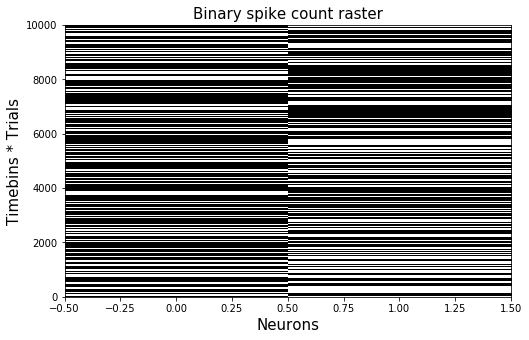

In [7]:
# Visualise y
plt.subplots(figsize=(8, 5))
plt.imshow(y.reshape(-1, num_neur), aspect='auto', origin='lower', cmap='binary')
plt.title('Binary spike count raster', fontsize=15)
plt.xlabel('Neurons', fontsize=15)
plt.ylabel('Timebins * Trials', fontsize=15)
plt.show()

In [8]:
# Do optimisation
dgopt = DGOptimise(data=y)    # Initialise optimiser

cov_y = dgopt.data_covariance    # Covariance of data
mean_hat = dgopt.gauss_mean    # Estimate of mean of multivariate Gaussian from data

corr_hat = dgopt.get_gauss_correlation(set_attr=True)    # Estimate of multivaraiate Gaussian correlation matrix

0.08387827440619469


In [9]:
print(mean_hat, mean)
print(corr_hat, corr)

[[0.40374533 0.28636314]] [[0.4 0.3]]
[[1.         0.08387827]
 [0.08387827 1.        ]] [[0.99999999 0.1       ]
 [0.1        0.99999999]]
